In [1]:
# Setup:
# 1. Uninstall previous version if already installed
%pip uninstall pyafmreader -y
# 2. Install pyafmreader from github 
# (temporary, when 1.0 releases it will be available via pip)
%pip install git+https://github.com/jlopezalo/pyafmreader.git

Found existing installation: pyafmreader x.x.x
Uninstalling pyafmreader-x.x.x:
  Successfully uninstalled pyafmreader-x.x.x
Note: you may need to restart the kernel to use updated packages.
  Cloning https://github.com/jlopezalo/pyafmreader.git to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-lqfdq_j5
  Running command git clone --filter=blob:none --quiet https://github.com/jlopezalo/pyafmreader.git /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-req-build-lqfdq_j5
  Resolved https://github.com/jlopezalo/pyafmreader.git to commit 214bf879e9ab637089a268c48c08eeaf379a3da2
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/TkTech/fasterzip.git to /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-install-_3k46otk/fasterzip_4d5139a346c94e15957aad21862b71b0
  Running command git clone --filter=blob:none --quiet https://github.com/TkTech/fasterzip.git /private/var/folders/4k/ps22fmxj3gx6vls78t2p63wh0000gn/T/pip-install-_3k46o

In [2]:
# 1. Import pyafmreader loadfile and matplotlib
from pyafmreader import loadfile
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
# Get documentation about loadfile function
help(loadfile)

Help on function loadfile in module pyafmreader.pyafmreader:

loadfile(filepath)
    Load AFM file. 
    
    Supported formats:
        - JPK --> .jpk-force, .jpk-force-map, .jpk-qi-data
        - JPK Thermal --> .tnd
        - NANOSCOPE --> .spm, .pfc
        - UFF --> .uff
    
            Parameters:
                    filepath (str): Path to the file.
            
            Returns:
                    If JPK, NANOSCOPE OR UFF:
                        UFF (uff.UFF): Universal File Format object containing loaded data.
                    If JPK Thermal:
                        Amplitude (m^2/V) (np.array),
                        Frequencies (Hz) (np.array),
                        Fit-Data (m^2/V) (np.array),
                        Parameters (dict)



In [3]:
JPK_FORCEMAP_PATH = '../tests/testfiles/qi-data-2022.04.01-16.51.44.168.jpk-qi-data'

In [4]:
UFF = loadfile(JPK_FORCEMAP_PATH)

Baseline
-2.3679749716960175e-10 -8.038910865951473e-10


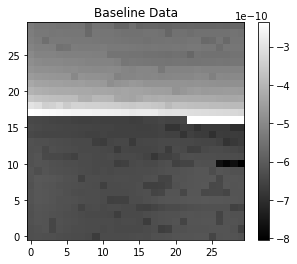

Height(measured)
1.0318537296123846e-05 4.972352524586739e-06


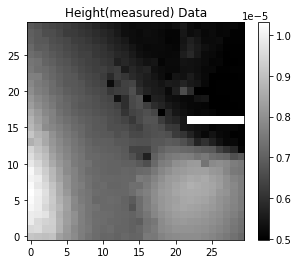

Height
7.970256690397914e-06 4.505544381644657e-06


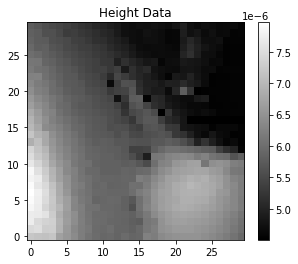

In [5]:
for channel, img in UFF.imagedata.items():
    print(channel)
    print(img.max(), img.min())
    im_ratio = img.shape[0] / img.shape[1]
    fig, axs = plt.subplots()
    channel_data = axs.imshow(img, cmap="gray", origin='lower')
    fig.colorbar(channel_data, ax=axs, fraction=0.046*im_ratio, pad=0.04)
    axs.set_title(f"{channel} Data")
    plt.show()